This notebook helps you visualize and validate the synthetic data generated by running `main.sh`/`main.py`. It selects a random file in the specified output dir and draws the corresponding bounding box around the image (which should go exactly around the board.)

'output/images\\synthetic_512.png'

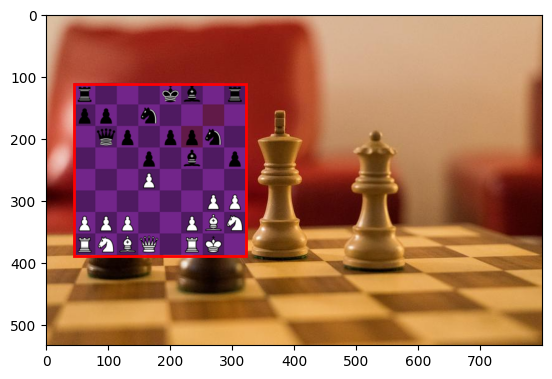

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import random

# Directories and file paths
image_dir = "output/images"
bounding_box_dir = "output/bounding_boxes"

# Display a particular image by its ID (ex. `0` for `output/images/000000.png`),
# or set to None to display a random one
IMAGE_ID: int | None = None

# Function to read the bounding box from a file
def read_bounding_box(bbox_file_path):
    with open(bbox_file_path, "r") as bbox_file:
        bbox = bbox_file.readline().strip().split(",")
    return [int(coord) for coord in bbox]


# Function to display an image with bounding box
def display_image_with_bbox(image_path, bbox):
    img = Image.open(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Create a Rectangle patch
    rect = patches.Rectangle(
        (bbox[0], bbox[1]),
        bbox[2] - bbox[0],
        bbox[3] - bbox[1],
        linewidth=2,
        edgecolor="r",
        facecolor="none",
    )

    # Add the patch to the Axes
    ax.add_patch(rect)

    plt.show()


if IMAGE_ID is None:
    # Read a random image and its bounding box from the output directory
    image_filename = random.choice(
        [f for f in os.listdir(image_dir)]
    )
else:
    image_filename = os.listdir(image_dir)[IMAGE_ID]
    assert int(image_filename.split('.')[0]) == IMAGE_ID

# Get the corresponding image in the bounding box directory
image_path = os.path.join(image_dir, image_filename)
bbox_file_path = os.path.join(bounding_box_dir, image_filename.replace(".png", ".txt"))

# Read the bounding box
bbox = read_bounding_box(bbox_file_path)

# Display the image with the bounding box
display(image_path)
display_image_with_bbox(image_path, bbox)